In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("D:\\Internshala\\shack labs\\Part 1\\DS - Assignment Part 1 data set.xlsx")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.shape

(414, 9)

In [4]:
df['Transaction date'].value_counts()

2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: Transaction date, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


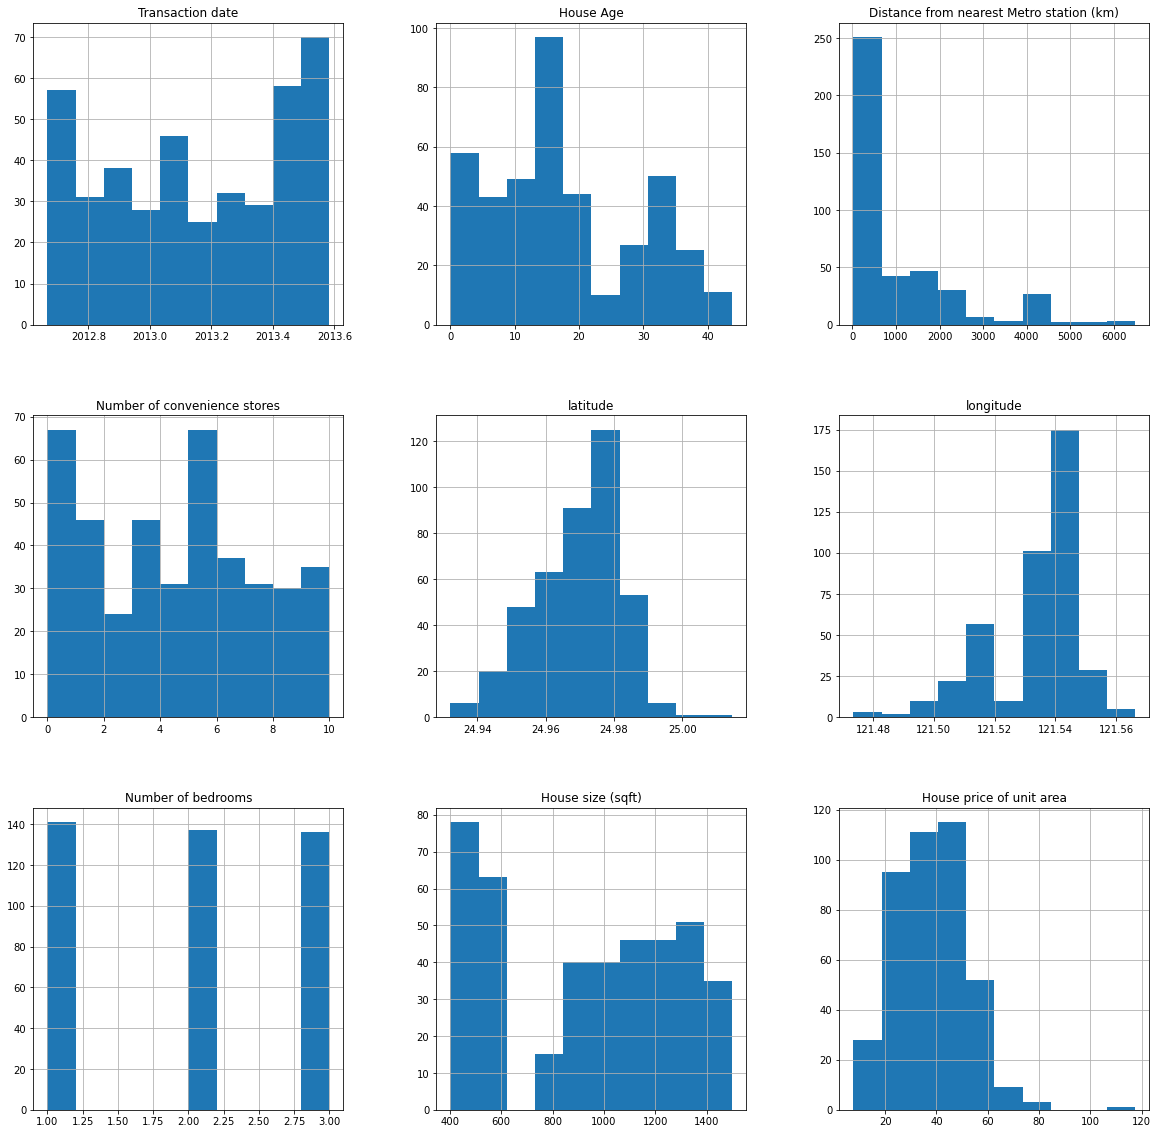

In [9]:
df.hist(figsize=(20,20));

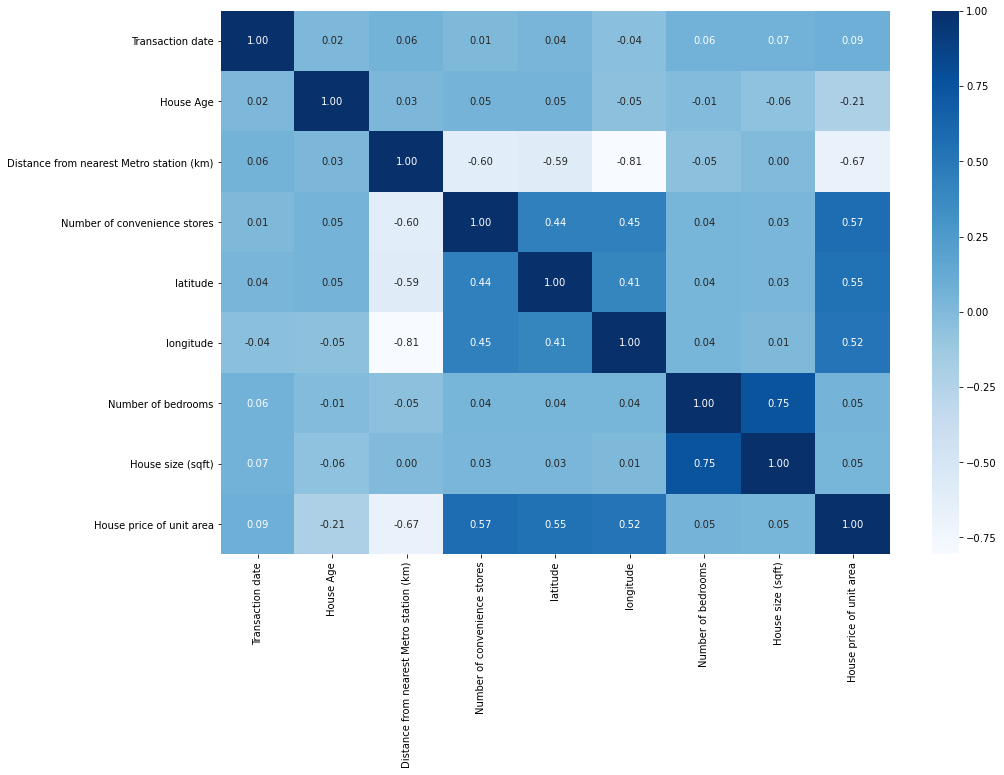

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt='.2f');

In [11]:
# There's a positive correlation between House size and Number of bedrooms 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df.drop('House price of unit area', axis=1)
y = df['House price of unit area']

In [14]:
x_train, x_test, y_train, y_test = train_test_split( x,y, random_state=1, test_size=0.20)

In [15]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(331, 8) (83, 8) (331,) (83,)


### Linear Regression Model

In [16]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
coef = pd.DataFrame(lr.coef_, x.columns, columns=['Co.eff'])
coef

,Co.eff
Transaction date,5.601593
House Age,-0.251018
Distance from nearest Metro station (km),-0.004878
Number of convenience stores,1.091410
latitude,227.214627
longitude,-35.062242
Number of bedrooms,0.795929
House size (sqft),-0.001352


In [20]:
print('Intercept:', lr.intercept_)

Intercept: -12645.695990160779


In [21]:
lr_y_train_predict = lr.predict(x_train)

In [22]:
lr_y_test_predict= lr.predict(x_test)
diff = pd.DataFrame({'Predicted':lr_y_test_predict, 'Actual': y_test})
diff.head()

,Predicted,Actual
388,34.638721,27.3
102,48.182479,54.4
187,21.535567,22.0
162,12.446454,11.6
90,42.939475,45.4


In [23]:
diff['Error'] = diff['Actual']-diff['Predicted']
diff.head()

,Predicted,Actual,Error
388,34.638721,27.3,-7.338721
102,48.182479,54.4,6.217521
187,21.535567,22.0,0.464433
162,12.446454,11.6,-0.846454
90,42.939475,45.4,2.460525


In [24]:
# data plotting

diff.reset_index(drop=True, inplace=True)
diff.reset_index(inplace=True)
diff.head(10)

,index,Predicted,Actual,Error
0,0,34.638721,27.3,-7.338721
1,1,48.182479,54.4,6.217521
2,2,21.535567,22.0,0.464433
3,3,12.446454,11.6,-0.846454
4,4,42.939475,45.4,2.460525
5,5,34.635703,23.0,-11.635703
6,6,31.946794,21.8,-10.146794
7,7,45.957175,32.2,-13.757175
8,8,37.505120,37.4,-0.105120
9,9,13.544743,22.6,9.055257


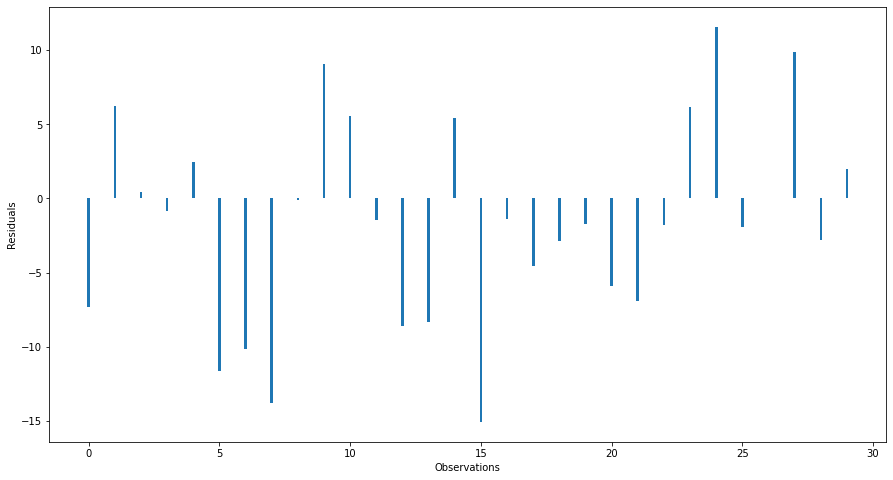

In [25]:
# plot residuals
plt.figure(figsize=(15,8))
plt.bar('index','Error', data=diff[:30], width=0.1)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()

In [26]:
table = pd.DataFrame({'Model': ['Linear Regression'],
                      'Train Score':lr.score(x_train,y_train),
                     'Test Score':lr.score(x_test,y_test),
                     'MSE Train': metrics.mean_squared_error(y_train,lr_y_train_predict),
                    'MSE Test':metrics.mean_squared_error(y_test,lr_y_test_predict),
                    'MAE Train':metrics.mean_absolute_error(y_train,lr_y_train_predict),
                    'MAE Test':metrics.mean_absolute_error(y_test,lr_y_test_predict)})
table

,Model,Train Score,Test Score,MSE Train,MSE Test,MAE Train,MAE Test
0,Linear Regression,0.551447,0.689954,85.342355,47.06061,6.400162,5.445173


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
rf_y_train_predict = rf.predict(x_train)

In [29]:
rf_y_test_predict = rf.predict(x_test)
diff = pd.DataFrame({'Predicted':rf_y_test_predict, 'Actual': y_test})
diff.head()

,Predicted,Actual
388,25.132,27.3
102,47.334,54.4
187,23.464,22.0
162,14.733,11.6
90,72.996,45.4


In [30]:
diff['Error'] = diff['Actual']-diff['Predicted']
diff.head()

,Predicted,Actual,Error
388,25.132,27.3,2.168
102,47.334,54.4,7.066
187,23.464,22.0,-1.464
162,14.733,11.6,-3.133
90,72.996,45.4,-27.596


In [31]:
# data plotting

diff.reset_index(drop=True, inplace=True)
diff.reset_index(inplace=True)
diff.head(10)

,index,Predicted,Actual,Error
0,0,25.132,27.3,2.168
1,1,47.334,54.4,7.066
2,2,23.464,22.0,-1.464
3,3,14.733,11.6,-3.133
4,4,72.996,45.4,-27.596
5,5,27.833,23.0,-4.833
6,6,26.491,21.8,-4.691
7,7,35.324,32.2,-3.124
8,8,39.909,37.4,-2.509
9,9,19.993,22.6,2.607


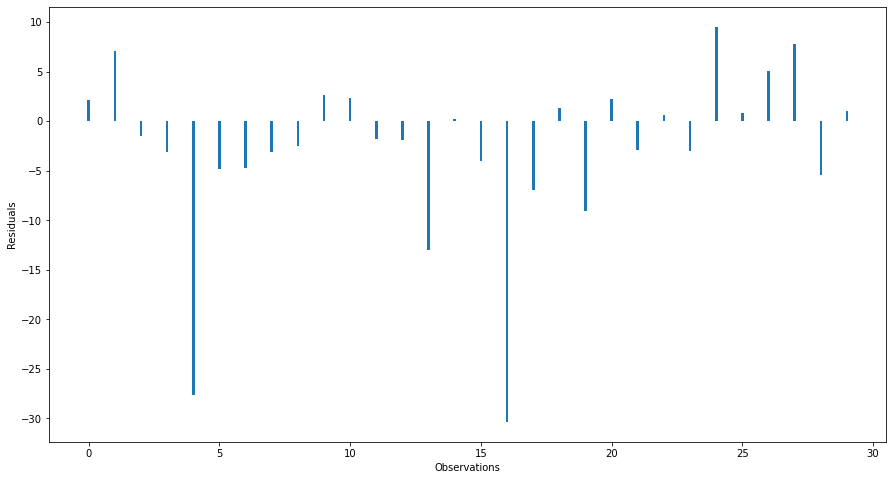

In [32]:
# plot residuals
plt.figure(figsize=(15,8))
plt.bar('index','Error', data=diff[:30], width=0.1)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()

In [33]:
table1 = pd.DataFrame({'Model': ['Random Forest'],
                      'Train Score':rf.score(x_train,y_train),
                     'Test Score':rf.score(x_test,y_test),
                     'MSE Train': metrics.mean_squared_error(y_train,rf_y_train_predict),
                    'MSE Test':metrics.mean_squared_error(y_test,rf_y_test_predict),
                    'MAE Train':metrics.mean_absolute_error(y_train,rf_y_train_predict),
                    'MAE Test':metrics.mean_absolute_error(y_test,rf_y_test_predict)})
table = pd.concat([table, table1])
table

,Model,Train Score,Test Score,MSE Train,MSE Test,MAE Train,MAE Test
0,Linear Regression,0.551447,0.689954,85.342355,47.060610,6.400162,5.445173
0,Random Forest,0.953089,0.618645,8.925381,57.884356,1.832810,5.118819


### KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [35]:
knn_y_train_predict = knn.predict(x_train)

In [36]:
knn_y_test_predict = knn.predict(x_test)
diff = pd.DataFrame({'Predicted':knn_y_test_predict, 'Actual': y_test})
diff.head()

,Predicted,Actual
388,26.90,27.3
102,43.88,54.4
187,31.18,22.0
162,20.36,11.6
90,46.38,45.4


In [37]:
diff['Error'] = diff['Actual']-diff['Predicted']
diff.head()

,Predicted,Actual,Error
388,26.90,27.3,0.40
102,43.88,54.4,10.52
187,31.18,22.0,-9.18
162,20.36,11.6,-8.76
90,46.38,45.4,-0.98


In [38]:
# data plotting

diff.reset_index(drop=True, inplace=True)
diff.reset_index(inplace=True)
diff.head(10)

,index,Predicted,Actual,Error
0,0,26.90,27.3,0.40
1,1,43.88,54.4,10.52
2,2,31.18,22.0,-9.18
3,3,20.36,11.6,-8.76
4,4,46.38,45.4,-0.98
5,5,27.32,23.0,-4.32
6,6,26.00,21.8,-4.20
7,7,19.78,32.2,12.42
8,8,48.10,37.4,-10.70
9,9,17.78,22.6,4.82


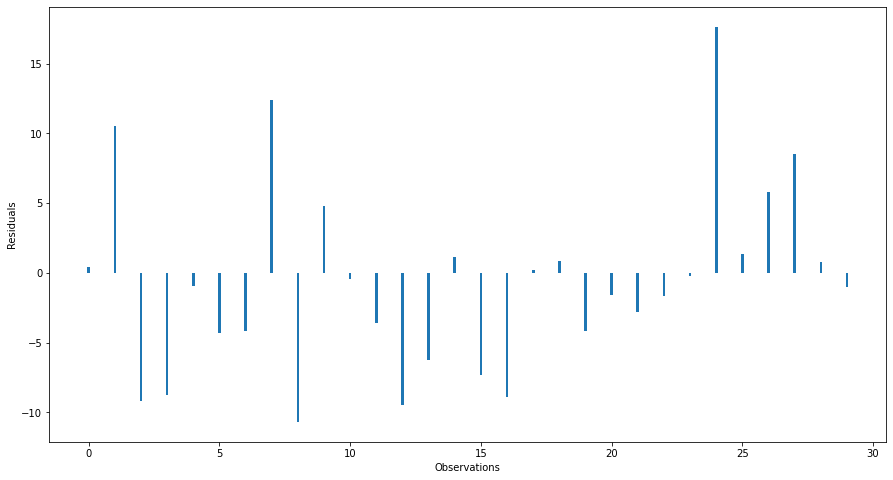

In [39]:
# plot residuals
plt.figure(figsize=(15,8))
plt.bar('index','Error', data=diff[:30], width=0.1)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()

In [40]:
table2 = pd.DataFrame({'Model': ['KNN'],
                      'Train Score':knn.score(x_train,y_train),
                     'Test Score':knn.score(x_test,y_test),
                     'MSE Train': metrics.mean_squared_error(y_train,knn_y_train_predict),
                    'MSE Test':metrics.mean_squared_error(y_test,knn_y_test_predict),
                    'MAE Train':metrics.mean_absolute_error(y_train,knn_y_train_predict),
                    'MAE Test':metrics.mean_absolute_error(y_test,knn_y_test_predict)})
table = pd.concat([table, table2])
table

,Model,Train Score,Test Score,MSE Train,MSE Test,MAE Train,MAE Test
0,Linear Regression,0.551447,0.689954,85.342355,47.060610,6.400162,5.445173
0,Random Forest,0.953089,0.618645,8.925381,57.884356,1.832810,5.118819
0,KNN,0.688126,0.604241,59.337549,60.070723,5.383927,5.801205


### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [42]:
dt_y_train_predict = dt.predict(x_train)

In [43]:
dt_y_test_predict = dt.predict(x_test)
diff = pd.DataFrame({'Predicted':dt_y_test_predict, 'Actual': y_test})
diff.head()

,Predicted,Actual
388,23.9,27.3
102,50.7,54.4
187,23.2,22.0
162,12.8,11.6
90,71.0,45.4


In [44]:
diff['Error'] = diff['Actual']-diff['Predicted']
diff.head()

,Predicted,Actual,Error
388,23.9,27.3,3.4
102,50.7,54.4,3.7
187,23.2,22.0,-1.2
162,12.8,11.6,-1.2
90,71.0,45.4,-25.6


In [45]:
# data plotting

diff.reset_index(drop=True, inplace=True)
diff.reset_index(inplace=True)
diff.head(10)

,index,Predicted,Actual,Error
0,0,23.9,27.3,3.4
1,1,50.7,54.4,3.7
2,2,23.2,22.0,-1.2
3,3,12.8,11.6,-1.2
4,4,71.0,45.4,-25.6
5,5,28.8,23.0,-5.8
6,6,27.7,21.8,-5.9
7,7,36.7,32.2,-4.5
8,8,34.4,37.4,3.0
9,9,22.1,22.6,0.5


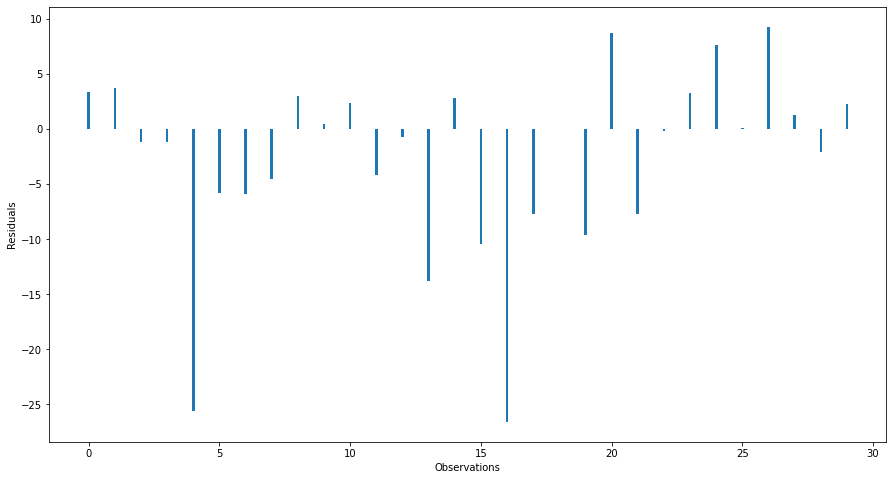

In [46]:
# plot residuals
plt.figure(figsize=(15,8))
plt.bar('index','Error', data=diff[:30], width=0.1)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()

In [47]:
table3 = pd.DataFrame({'Model': ['DT'],
                      'Train Score':dt.score(x_train,y_train),
                     'Test Score':dt.score(x_test,y_test),
                     'MSE Train': metrics.mean_squared_error(y_train,dt_y_train_predict),
                    'MSE Test':metrics.mean_squared_error(y_test,dt_y_test_predict),
                    'MAE Train':metrics.mean_absolute_error(y_train,dt_y_train_predict),
                    'MAE Test':metrics.mean_absolute_error(y_test,dt_y_test_predict)})
table = pd.concat([table, table3])
table

,Model,Train Score,Test Score,MSE Train,MSE Test,MAE Train,MAE Test
0,Linear Regression,0.551447,0.689954,85.342355,47.060610,6.400162,5.445173
0,Random Forest,0.953089,0.618645,8.925381,57.884356,1.832810,5.118819
0,KNN,0.688126,0.604241,59.337549,60.070723,5.383927,5.801205
0,DT,1.000000,0.487890,0.000000,77.731205,0.000000,6.167470


In [48]:
table.reset_index(inplace=True)
table.drop('index', axis= 1, inplace=True)
table

,Model,Train Score,Test Score,MSE Train,MSE Test,MAE Train,MAE Test
0,Linear Regression,0.551447,0.689954,85.342355,47.060610,6.400162,5.445173
1,Random Forest,0.953089,0.618645,8.925381,57.884356,1.832810,5.118819
2,KNN,0.688126,0.604241,59.337549,60.070723,5.383927,5.801205
3,DT,1.000000,0.487890,0.000000,77.731205,0.000000,6.167470


#### Out of all the models, Random Forest shows better results with train score of 95.72% and test score of 61.16%.
#### Random forest is also an ensemble technique, which is suitable for complex datasets, which gives high accuracy and reduces model overfitting.
#### The main drawback of RF model is the slow processing speed.
#### We can further improve this model by hyper-tuning with GridSearchCV

### Feature Importance

First 3 important featrues:	 Important    84.068
dtype: float64
First 5 important featrues:	 Important    94.436
dtype: float64


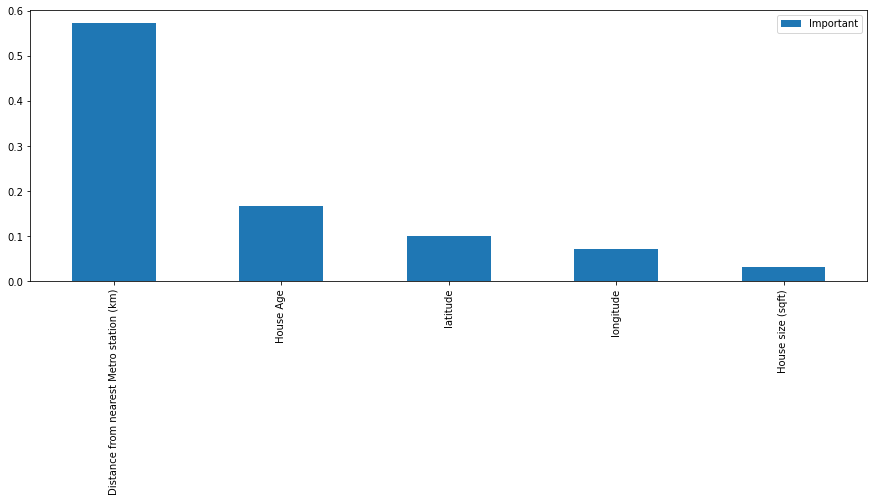

In [49]:
rf_imp_feature = pd.DataFrame(rf.feature_importances_, columns = ["Important"], index = x_test.columns)
rf_imp_feature.sort_values(by="Important",ascending=False)
rf_imp_feature['Important'] = rf_imp_feature['Important'].map('{0:.5f}'.format)
rf_imp_feature = rf_imp_feature.sort_values(by="Important",ascending=False)
rf_imp_feature.Important = rf_imp_feature.Important.astype("float")

rf_imp_feature[:5].plot.bar(figsize=(15,5))

print("First 3 important featrues:\t",(rf_imp_feature[:3].sum())*100)
print("First 5 important featrues:\t",(rf_imp_feature[:5].sum())*100)

#### The top 5 important features that determine the house price are

##### 1. Distance from nearest Metro station (km)
##### 2. House Age
##### 3. latitude
##### 4. longitude
##### 5. House size (sqft)